# Day 4 - An Introduction to Machine Learning

## Introduction


In today's Day 4 tutorial you will be learning some basics about machine learning and neural networks.

### What are neural networks?

Neural networks (NN), also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. The concept of neural networks lies at the intersection of mathetics and computational programming. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another to process input and recognize patterns.

Artificial neural networks (ANNs) are comprised of **node layers**, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial "neuron", connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

Simply put: neural networks are effectively computer programs created to recognize patterns and solve common problems in the fields of artificial intelligence, machine learning, and deep learning. 

In today's example we will be constructing and training a very simple neural network program to classify flowers.

### Outline

Over the course of this tutorial, you will explore:

- the basic structure of neural networks
- linear and non-linear seperability of a sample
- activation and sigmoid functions
- the importance of training data
- how to construct a basic NN in Python

## Let's Get Started

Imagine that you own a flower farm with many fields of various types of flowers. Visiting each field to monitor the growth of your crops takes a lot of time and energy (you own lots of land!) and so your goal is to develop a method for monitoring your crops remotely.

You devise a plan to accomplish this by using a drone to take images of your fields which you can then examine to keep track of how many of each type of flower you have in stock.

You decide to test this plan on a beautiful field of red poppies and purple cornflowers nearby.

<img src="imgs/field_of_flowers.jpg" alt="Alternative text" />

***

#### Q - Describe below how a computer program might be able to identify differences between poppies and cornflowers in the drone images. What are some simple but identifying characteristics between these two types of flowers?

***

Ans. Here



Some of the characteristics you have identified may include the color and shape of a flower's petal. Cornflowers are purple and have smaller, more elongated petals. By contrast, poppies are bright red and have larger, rounder petals.

In this sense, the *color* (c), *length* (l) and *width* (w) of a flower petal can be a helpful way of identifying between the two flower types.

You decide to begin your classification journey by using these characteristics, or **parameters** to distinguish between the two species of flowers in your field. You head over to a few of your closest fields to make a table of some parameter values for a sample of petals from these flowers.

In [4]:
# petal data table; in cm

data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

In the table above, each row represents the average value measured (in cm) for the petals of flowers in that field. The three columns represent the length, width, and type of flower, respectively. To simplify things, you choose a boolean classification scheme for the last column: a value of 1 indicates a red poppy, whereas a value of 0 indicates a blue cornflower.

Later that day, a customer that recently purchased flowers from your shop contacts you requesting to place another order. Unfortunately the customer state they have forgotten the name of the type of flowers they purchased!

You realize this presents an excellent test of your flower classification system. You inform to the customer that this is no problem, and all they need to do is email a description of the flower's petals.

In response the customer sends along a black and white photo of a petal and info stating that the petal measures roughly 4.5 cm long and 1 cm wide. You enter these parameter values for this mystery flower into your system:

In [5]:
mystery_flower = [4.5, 1]   #in cm

***

#### Q - What parameter identified above is not represented in the data provided by the customer?

***

Ans. Here

You decide to begin by first visualizing your dataset. In the code cell below, construct a matplotlib figure which scatter plots out the data we collected from our fields alongside the values for our mystery flower.

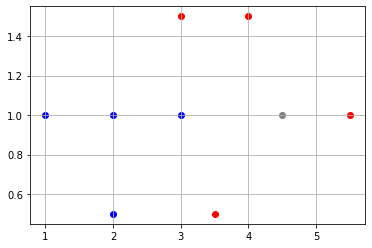

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def vis_data():
    plt.grid()

    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c = 'b'
        plt.scatter([data[i][0]], [data[i][1]], c=c)

    plt.scatter([mystery_flower[0]], [mystery_flower[1]], c='gray')

vis_data()

***

#### Q - Using your figure above, can you make a prediction for what kind of flower the customer is requesting to order? How confident are you in your prediction? What would make you more/less confident?

***

Ans. Here

Believe it or not, this process of using one dataset to make predictions about another (unknown) dataset is one simple example of how a basic neural network functions. The only real difference here is that in the example above, you used the neuronal network in your brain to visualize the data and make a guess for how to classify the flower. 

In the case of the neural networks we aim to explore today, this process takes place inside a computer, which presents a number of big advantages. 

Imagine that you had 100 customers all looking to place similar orders. It would take you quite some time to individually classify each customers petal. Instead, you could program a neural network to use computational power to make a large number of predictions very quickly.

## Neural Network Structure

The basic input/output structure of a simple neural network looks as follows:

In [7]:
# network structure

#       o  flower type
#      / \  
#     o   o  length, width

In the diagram above, the **input** is the parameter values *length* and *width*. The **output** is the *flower type*.

In reality, the output of a NN is a prediction for the flower type as opposed to a strict classification. In the example above, 0 represented a cornflower and 1 a red poppy. 

In this case, an output value closer to 1 indicates more likelihood that the flower is indeed a poppy.

We can generalize this structure as follows:

This input/output structure represents a function, or a relationship between the input and output. In the case of neural networks, part of this relationship is typically represented by something called an **activation function**.

In [8]:
# network structure

#        (O)
#       /   \
#      /     \  
#    (M1)   (M2)  

Here, M1 and M2 represent the inputs, or "measurement 1" and "measurement 2". The arms connecting these measurements to the output are typically referred to as the respective "weights" of these values within the neural network (W1 & W2).

The mathematical connection between the input and output is simply a weighted sum of the inputs. In other words, the NN function is:

<h2><center>NN(M1, M2) = (M1 * W1) + (M2 * W2) + B</center></h2>

Here, B is what is known as the "bias", and in short it ensures that the prediction by the neural network is not based solely on just these two measurements. But more on this to come later!

Because we know we want our output to fall somewhere 0 and 1, we will utilize something called the **sigmoid function**.

### Sigmoid Function

Whether you develop a neural network yourself or you use a built in library for neural network learning, it is really important to understand the significance of a sigmoid function. The sigmoid function is the key to understanding how a neural network learns complex problems and makes predictions. This function has also served as a basis for discovering other functions that lead to efficient and good solutions for supervised learning in deep learning architectures.

The sigmoid function is a special form of the logistic function and is usually denoted by σ(x) or sig(x). It is given by:

In [9]:
# defining the sigmoid function

def sigmoid(x):
    return 1/(1+np.exp(-x))

We can also define the derivative the sigmoid function (which will become useful later):

In [10]:
def d_sigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))

The graph of sigmoid function is an S-shaped curve as shown by the blue line in the graph below. This figure also shows the graph of its derivative in red.

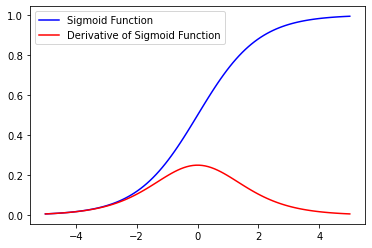

In [11]:
X = np.linspace(-5, 5, 100)

plt.plot(X, sigmoid(X), c="b", label="Sigmoid Function") # sigmoid in blue
fig = plt.plot(X, d_sigmoid(X), c="r", label="Derivative of Sigmoid Function") # sigmoid_p in red
plt.legend()

Note: The range of the sigmoid function lies between 0 & 1. This allows us to "squash" our output to the desired range 0 --> 1.

## Building our NN

We incorporate the sigmoid function into our neural network as follows:

<h2><center>NN(M1, M2) = sigmoid [(M1 * W1) + (M2 * W2) + B]</center></h2>

Here, we've simply popped in our weighted average of the points (plus the bias) into our sigmoid function.

Let's begin by first assuming random values for the W1, W2, and B parameters in our neural network. 

(Another way of thinking about this is by assuming that all the *connections* in our neural network's computer brain are random!)

In the cell below, write a block of code which computes NN(2, 1) assuming W1, W2, and B have random values.

In [29]:
M1 = 2.
M2 = 1.
W1 = np.random.randn()
W2 = np.random.randn()
B = np.random.randn()

X = (M1 * W1) + (M2 * W2) + B

print(sigmoid(X))

0.9984071133839796


***

#### Q - What kind of flower does the NN predict this type of petal belongs to? Does this make sense given your figure above?

***

Ans. Here

We decided before that for numbers closer to 1, the computer predicts this petal belongs to a red flower. However, if you look at the table above, we know these measurements belong to a blue flower. Hmm.. what's going on?

***

#### Q - Make some additional predictions using the table of petal values we measured for our fields above? How well does our simple neural network classify these flowers?

***

Ans. Here

Remember that the connections (e.g. the weights and bias) inside our computer's "brain" right now are entirely random! What we need to do next is to help *train* our computer brain to do a better job of making predictions.

We can do this training using the dataset we have in hand. This allows us to basically provide our computer brain with a bunch of known examples and teach it to make better predictions. Another term for this method of training is called **back propagation**.

## Squared Error Cost Function

So what we want to do next is implement something called a **cost function**.

A cost function takes in data (in our case, petal measurements) and past predictions made on that data by our NN, and uses this information to spit out a number which represents the *quality* of those predictions (how far our predictions are from where they should be).

Cost functions effectively measure the performance of a machine learning model for a given dataset. Cost function quantifies the error between predicted values and expected values and presents it in the form of a single real number. 

The purpose of Cost Function is to be either:

 - **Minimized** - The goal is to find the values of model parameters for which Cost Function return as small number as possible.

 - **Maximized** - The goal is to find values of model parameters for which returned number is as large as possible.

The only thing we can really do to change the output of our cost function is to change our predictions, which depends on the data and the weights and biases. We can define our cost function as follows:

<h2><center>Cost = (prediction - target)^2</center></h2>

This is what is referred to as the **squared error cost function**. Here, we want to *minimize* the values (i.e. the difference between our model predictions and data) output by our cost function. 

You should recall from previous notebooks (Day 3?) that linear regression has very similar goals and attempts to model the relationship between two variables by fitting a linear equation to observed data. Fitting models allows us to predict the value of a variable based on the value of another variable.

Our neural network function NN() described above is essentially a model we are using to describe our dataset and make predictions. Therefore, we can use principles from linear regression analysis (and calculus!) to define a pathway towards minimizing our cost function and, therefore, improving our model performance.

Here, W1, W2, and B are the parameters of our data model which we will vary in order to minimize the cost function.

Let's explore an example in which we use the table of petals values measured from our fields above to train our simple neural network.

In the cell below, write a code block which calculates NN(M1, M2) for the flower petals in the data table above, assuming random parameter model values.

In [52]:
#estimating the sigmoid function for our measured petal values

for i in range(len(data)):
    flr = data[i]
    
    wt_sum = flr[0]*W1 + flr[1]*W2 + B
    pred = sigmoid(wt_sum)
    
    target = flr[2]
    
    cost = np.square(pred - target)

    print(flr)
    print(cost)

[3, 1.5, 1]
2.0292794110914027e-09
[2, 1, 0]
0.9968167640557306
[4, 1.5, 1]
8.674779748205576e-13
[3, 1, 0]
0.9999340332863274
[3.5, 0.5, 1]
1.2059255946087063e-11
[2, 0.5, 0]
0.9976677635810113
[5.5, 1, 1]
4.109872793885451e-18
[1, 1, 0]
0.8618526037290055


As observed before, with random model values, our NN doesn't do a great job of classifying our flowers. Let's start to train it.
 

## Training our Neural Network

Recall that the goal here is to MINIMIZE our cost function. 

From calculus, we know that:
 - the derivative of a function gives us the slope of the line tangent to the function at any point on the graph
 - when a function's slope is zero at x, and the second derivative at x is less than 0, it is a local maximum. If the second derivative at x is greater than 0, it is a local minimum.
 - when dealing with multi-variate equations (functions of more than one variable or input) this derivative is often referred to as the *gradient*.

Imagine you are at the top of a mountain and want to descend. There may be many available paths, but you want to reach the bottom with a minimum number of steps. How can you come up with a solution? To answer that question, we will solve the gradient descent problem. 

**Gradient descent** is one of the simplest algorithms that is used, not only in linear regression but in many aspects of machine learning. Gradient descent algorithm’s main objective is to minimize the cost function and zt is one of the best optimization algorithms to minimize errors (difference of actual value and predicted value).
 
We'll be working here through a process similar that explored in the Day 3 notebook on linear regression. (Obviously one main difference here is that linear regression uses Least Squared Error as a cost function that gives a convex loss function which we then go on to complete the optimization by finding its vertex as a global minimum.)

So the first step here in trying to work our way towards the local or global minimum of the cost function is to first compute the gradient of the cost function. in fact, the derivative of the cost function is referred to as the cost function gradient. As we move along the cost function gradient, the cost function will continue to decrease until we reach a global (or local) minimum.

To simplify things let's first rename our weighted sum to the variable z:

In [37]:
z = flr[0]*W1 + flr[1]*W2 + B

Next we outline a function for minimizing our cost function: 

First, we select out a random data point (i.e. row in the table) and use the chain rule to compute the gradient of the cost function with respect to each of the independent variables (W1, W2, B) at that point. We then use these computed gradients to update/modify our parameter values and effectively walk our data model down towards the minimum of the cost function. When considering the analogy above, this is similar to taking baby steps down a hill.

We aim to iterate through this process until the estimated value of the cost function is minimized.

A simple example of this method is provided in the code block below:

In [47]:
# a simple training method for our NN

def train():
    #random init of weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 10000
    learning_rate = 0.1
    costs = [] # keep costs during training, see if they go down
    
    for i in range(iterations):
        # get a random point
        ri = np.random.randint(len(data))
        point = data[ri]
        
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # networks prediction
        
        target = point[2]
        
        # cost for current random point
        cost = np.square(pred - target)
        
        # print the cost over all data points every 1k iters
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)
        
        dcost_dpred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dz = dcost_dpred * dpred_dz
        
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
        
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
    return costs, w1, w2, b
        
costs, w1, w2, b = train()

in the cell below, write a code block which displays a graph of the value of the cost function over time.

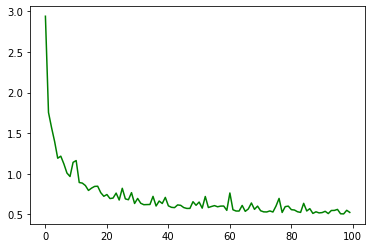

In [48]:
fig = plt.plot(costs, c="g")

***

#### Q - What happens as you vary the number of iterations in your loop? How does the figure change? Provide your interpretation of these observations.

***

Ans. Here

***

#### Q - Has your cost function been minimized? How do you know?

***

Ans. Here

Now let's try to apply this updated model to predict what kind of flower our customer is looking to buy.

Write a block of code in the cell below which performs this task. 

In [49]:
# predict what the mystery flower is!

z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
pred = sigmoid(z)

print(pred)
print("close to 0 -> blue, close to 1 -> red")

0.9701191213337037
close to 0 -> blue, close to 1 -> red


***

#### Q - What kind of flower does our trained model predict this type of petal belongs to?

***

Ans. Here

Yes! The model now predicts that this petal belongs to a red poppy flower!

<img src="imgs/redpoppy.jpg" alt="Alternative text" />

You can see from this that going through the process of training the network has resulted in a much better prediction.

We can take this one step further to explore how our network forms prediction for other pairs of independent variables by plotting out the following figure in the x,y plane of parameter space:

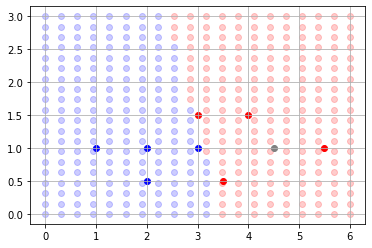

In [51]:
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
        
vis_data()

Here, we plot the data points of from our measurements in the flower fields (our known dataset in bright red/blue circles) in comparison with predictions across parameter space from our neural network (the slightly faded red/blue circles).

What we observe here is that there is a clear (somewhat linear) split in how our network classifies flower petals. Indeed, roughly half the predictions indicate blue flowers and half of them red. We also observe nice overlap between our known data points and our network's range of predictions.

## Conclusions

This notebook describes one simple example of training a basic neural network. Here, we used the network to classify flowers, but neural networks are used often in astronomy to comb through large datasets and make discoveries. In the next notebook, we will explore an example of using neural networks in an astrophysical context. But before we do that - it's your time to brainstorm:

***

#### Q - Describe some ways in which you think machine learning may be useful in astronomy research?

***

Ans. Here